In [1]:
import matplotlib.pyplot as plt
import matplotlib.collections
import pandas as pd 
import numpy as np
np.set_printoptions(threshold=np.inf)
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from math import sqrt

### read the data

In [2]:
import pandas as pd 
data = pd.read_csv("winequality-white.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
X = data.drop(["quality"], axis=1)
y = data["quality"] 

## Oversampling the data

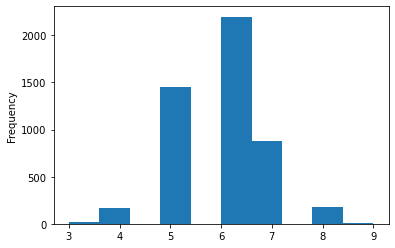

In [5]:
y.plot.hist()

In [88]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='auto', random_state=2, k_neighbors=2)

# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_sample(X, y)
oversampled_data = pd.concat([pd.DataFrame(oversampled_X), pd.DataFrame(oversampled_Y)], axis=1)


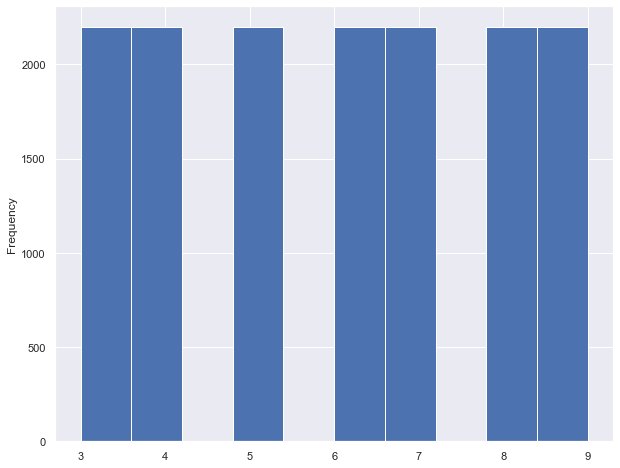

In [89]:
oversampled_data['quality'].plot.hist()

### normalize the data useing z-score

In [80]:
mean = oversampled_X.mean()
std = oversampled_X.std()
normalized_X = (oversampled_X - mean)/std
normalized_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.081767,-0.267496,0.197589,3.400489,0.048771,0.398211,0.678849,2.601131,-1.462237,-0.298797,-1.563794
1,-0.804069,0.020708,0.008672,-0.923994,0.230100,-0.827224,-0.059842,0.140312,0.639776,0.079823,-1.022984
2,1.053279,-0.171428,0.575423,0.275994,0.275432,-0.194741,-0.740216,0.527012,0.359508,-0.393452,-0.559432
3,0.124605,-0.651767,-0.180245,0.638254,0.638090,0.477272,0.989877,0.702785,-0.130962,-0.772073,-0.713950
4,0.124605,-0.651767,-0.180245,0.638254,0.638090,0.477272,0.989877,0.702785,-0.130962,-0.772073,-0.713950


### split the data

In [81]:
X_train, X_test, y_train, y_test = train_test_split(normalized_X, oversampled_Y, test_size=0.18, random_state=42)

In [82]:
train_normalized_data = X_train.copy()
train_normalized_data['quality'] = y_train

test_normalized_data = X_test.copy()
test_normalized_data['quality'] = y_test

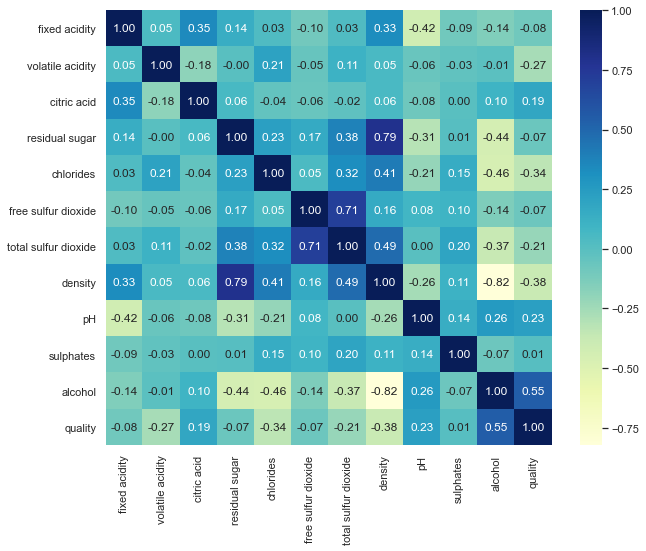

In [83]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
corr = oversampled_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="YlGnBu",
            annot=True,
           fmt=".2f")
plt.show()

# Question 1.a - Regrestion
we'll try out three regresion models and compair them.
1. linear regrestion
2. SVM Regresor
3. neural network regresor

# Linear Regrestion

In [84]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print('score = ', reg.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
a=reg.predict(X_train)
train_rmse= (mean_squared_error(a,y_train)) ** 0.5
print('train_rmse =', train_rmse)
b=reg.predict(X_test)
test_rmse= (mean_squared_error(b,y_test)) ** 0.5
print('test_rmse =', test_rmse)

score =  0.4486567976631314
train_rmse = 1.4710731258698422
test_rmse = 1.4664960384758166


In [85]:
reg.coef_

array([ 0.42957673, -0.38319728,  0.18588449,  1.49396139, -0.06199969,
       -0.14046652,  0.04711581, -1.81413262,  0.57056947,  0.18227106,
        0.14476334])

In [86]:
# polinomial regresion
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


p_reg = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])

p_reg = p_reg.fit(X_train, y_train)
p_reg.named_steps['linear'].coef_

array([ 6.00582031e+00,  5.42284968e-01, -5.02356738e-01,  1.91227142e-01,
        1.29654018e+00, -4.12613304e-01,  1.97227917e-01,  2.69268167e-01,
       -1.68912525e+00,  5.07312480e-01,  2.51501448e-01,  7.11832268e-02,
        1.04244485e-02, -1.89390567e-01,  4.74015299e-01,  3.20953672e-01,
       -2.98129509e-01, -2.60667690e-01,  7.88688245e-02, -3.68387547e-01,
        5.62269615e-01,  8.01378803e-03, -1.18585797e-01,  1.04047542e-01,
        5.43289024e-03, -3.18445919e-01, -1.08553723e-02, -7.86116480e-02,
        1.19749963e-01,  3.61391938e-01, -3.09851611e-02, -3.21048144e-02,
        2.08049566e-01, -5.01176014e-02,  2.89656973e-01, -3.13040492e-02,
        1.61183040e-01,  8.29084534e-03, -6.30090724e-01,  1.65923699e-01,
        1.46939033e-01, -3.25685833e-01, -4.85237457e-01, -7.28342292e-01,
        1.16379213e-01, -2.42063468e-01,  1.06619679e+00,  3.40703279e-01,
       -2.61660919e-01,  4.08517891e-01,  3.88140196e-02,  4.75978541e-04,
       -5.50598656e-02,  

In [87]:
from sklearn.metrics import mean_squared_error
print ('score = ', p_reg.score(X_test, y_test))
a = p_reg.predict(X_train)
train_rmse = (mean_squared_error(a, y_train)) ** 0.5
print('train_rmse =', train_rmse)
b=  p_reg.predict(X_test)
test_rmse = (mean_squared_error(b, y_test)) ** 0.5
print('test_rmse =', test_rmse)

score =  0.6625181779801186
train_rmse = 1.1537267656697932
test_rmse = 1.1473477663641494


# SVM Regresor

In [42]:
from sklearn import svm
regr_rbf = svm.SVR(kernel='rbf', C=0.5, gamma=1)
regr_lin = svm.SVR(kernel='linear')
regr_poly =svm.SVR(kernel='poly', degree = 2)
regr_rbf.fit(X_train, y_train)
regr_lin.fit(X_train, y_train)
regr_poly.fit(X_train, y_train)

SVR(degree=2, kernel='poly')

In [43]:
print('regr_rbf score = ',regr_rbf.score(X_train,y_train))
a = regr_rbf.predict(X_train)
train_rmse = (mean_squared_error(a, y_train)) ** 0.5
print('regr_rbf train_rmse = ',train_rmse)
b=  regr_rbf.predict(X_test)
test_rmse = (mean_squared_error(b, y_test)) ** 0.5
print('regr_rbf test_rmse = ', test_rmse, '\n')

print('regr_lin score = ',regr_lin.score(X_train,y_train))
a = regr_lin.predict(X_train)
train_rmse = (mean_squared_error(a, y_train)) ** 0.5
print('regr_lin train_rmse = ',train_rmse)
b=  regr_lin.predict(X_test)
test_rmse = (mean_squared_error(b, y_test)) ** 0.5
print('regr_lin test_rmse = ', test_rmse,'\n')

print('regr_poly score = ',regr_poly.score(X_train,y_train))
a = regr_poly.predict(X_train)
train_rmse = (mean_squared_error(a, y_train)) ** 0.5
print('regr_poly train_rmse = ',train_rmse)
b=  regr_poly.predict(X_test)
test_rmse = (mean_squared_error(b, y_test)) ** 0.5
print('regr_poly test_rmse = ', test_rmse)

regr_rbf score =  0.9839473166862536
regr_rbf train_rmse =  0.25408779722112323
regr_rbf test_rmse =  0.3943492798967337 

regr_lin score =  0.4164432833792763
regr_lin train_rmse =  1.5319744603559584
regr_lin test_rmse =  1.5110992004231583 

regr_poly score =  0.30040757359414216
regr_poly train_rmse =  1.677384164920809
regr_poly test_rmse =  1.710531238085811


# Neural Network Regresor 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.models import Model
import tensorflow as tf

In [ ]:
NN_model = Sequential()
NN_model.add(Dense(9, input_dim=11, activation= "selu"))
NN_model.add(Dense(6, activation= "selu"))
NN_model.add(Dense(4, activation= "selu"))
NN_model.add(Dense(2, activation= "selu"))
NN_model.add(Dense(1))

In [ ]:
NN_model.compile(loss= "mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])
#history = NN_model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])
history = NN_model.fit(X_train, y_train, epochs=70, validation_split=0.3)

In [ ]:
print(history.history.keys())

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
a = NN_model.predict(X_train)
train_rmse = (mean_squared_error(a, y_train)) ** 0.5
print('NN train_rmse = ',train_rmse)
b=  NN_model.predict(X_test)
test_rmse = (mean_squared_error(b, y_test)) ** 0.5
print('NN test_rmse = ', test_rmse)

# Question 1.b - Clustering
we'll try out three clustering methoods and compair them.
1. DBSCAN
2. K-Means
3. GMM

In [ ]:
from sklearn.cluster import MeanShift
import numpy as np

clustering = MeanShift(bandwidth=3).fit(normalized_X)
clustering.labels_


clustering

In [ ]:
clustering.labels_

In [ ]:
data['MeanShift_cluster'] = pd.Series(clustering.labels_, index=data.index)

In [ ]:
hist_dictionary = {}
for i in clustering.labels_:
    if str(i) in hist_dictionary:
        hist_dictionary[str(i)] = hist_dictionary[str(i)] + 1
    else:
        hist_dictionary[str(i)] = 1
clusters_names_numeric = [int(x) for x in hist_dictionary.keys()]
clusters_names_numeric.sort()
clusters_names = [str(name) for name in clusters_names_numeric]
points_amount_for_cluster = [hist_dictionary[x] for x in clusters_names]

clustering_hist_df = pd.DataFrame([points_amount_for_cluster])
clustering_hist_df.columns = clusters_names
print('Table of the component number, and how many points each one of them has:')
clustering_hist_df

In [ ]:
data[data.MeanShift_cluster == 0]['quality'].min()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))

model = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
model.fit(normalized_X.drop(['free sulfur dioxide','citric acid'], axis=1))
labels = model.labels_
data['Agglomerative_cluster'] = pd.Series(model.labels_, index=data.index)

In [ ]:
for i in range(0,7):
    print('min',data[data.Agglomerative_cluster==i]['quality'].min())
    print('max',data[data.Agglomerative_cluster==i]['quality'].max())
    print('mean',data[data.Agglomerative_cluster==i]['quality'].mean())

In [ ]:
hist_dictionary = {}
for i in model.labels_:
    if str(i) in hist_dictionary:
        hist_dictionary[str(i)] = hist_dictionary[str(i)] + 1
    else:
        hist_dictionary[str(i)] = 1
clusters_names_numeric = [int(x) for x in hist_dictionary.keys()]
clusters_names_numeric.sort()
clusters_names = [str(name) for name in clusters_names_numeric]
points_amount_for_cluster = [hist_dictionary[x] for x in clusters_names]

clustering_hist_df = pd.DataFrame([points_amount_for_cluster])
clustering_hist_df.columns = clusters_names
print('Table of the component number, and how many points each one of them has:')
clustering_hist_df

In [ ]:
normalized_data = normalized_X.copy()

In [ ]:
normalized_data['quality']=y

In [ ]:
### AN EXAMPLE OF DEEP AUTOENCODER WITH MULTIPLE LAYERS
# InputLayer (None, 10)
#      Dense (None, 20)
#      Dense (None, 10)
#      Dense (None, 5)
#      Dense (None, 3)
#      Dense (None, 5)
#      Dense (None, 10)
#      Dense (None, 20)
#      Dense (None, 10)
 
input_dim = Input(shape = (11, ))
# DEFINE THE DIMENSION OF ENCODER ASSUMED 3
encoding_dim = 3
# DEFINE THE ENCODER LAYERS
encoded1 = Dense(20, activation = 'relu')(input_dim)
encoded2 = Dense(10, activation = 'relu')(encoded1)
encoded3 = Dense(5, activation = 'relu')(encoded2)
encoded4 = Dense(encoding_dim, activation = 'relu')(encoded3)
# DEFINE THE DECODER LAYERS
decoded1 = Dense(5, activation = 'relu')(encoded4)
decoded2 = Dense(10, activation = 'relu')(decoded1)
decoded3 = Dense(20, activation = 'relu')(decoded2)
decoded4 = Dense(11, activation = 'sigmoid')(decoded3)
# COMBINE ENCODER AND DECODER INTO AN AUTOENCODER MODEL
autoencoder = Model(input_dim, decoded4)
# CONFIGURE AND TRAIN THE AUTOENCODER
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs = 100, batch_size = 100, shuffle = True, validation_data = (X_test, X_test))
# THE ENCODER TO EXTRACT THE REDUCED DIMENSION FROM THE ABOVE AUTOENCODER
encoder = Model(input_dim, encoded4)
encoded_input = Input(shape = (encoding_dim, ))
encoded_out = encoder.predict(X_test)
encoded_out[0:2]

In [ ]:
decoder = Model(encoded4, decoded4)
decoder_input = Input(shape = (encoding_dim, ))
decoder_out = decoder.predict(encoded_out[0:2])
decoder_out

# For Tom

### K_MEANS Elbow Method

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_train)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
clsuter = KMeans(n_clusters=300)
clsuter = cluter.fit(X_train)
new_y_train = pd.DataFrame(y_train.copy(),columns=['quality'])
len(clsuter.labels_)
new_y_train.count()
new_y_train['KMeans_cluster'] = pd.Series(clsuter.labels_, index=newy_train.index)
new_y_train['KMeans_cluster'].max()

In [ ]:
def getClusterMeanDict(df: pd.DataFrame, cluster_column_name: str, quality_column_name='quality'):
    cluster_quality_dict = {}
    for i in df[cluster_column_name].unique():
        cluster_quality_dict[i] = df[df[cluster_column_name]==i][quality_column_name].mean()
    return cluster_quality_dict

In [ ]:
KM_score_dict = getClusterMeanDict(new_y_train,cluster_column_name = 'KMeans_cluster')

In [ ]:
def cluster_score(cluster_quality_dict: dict, test_cluster_lables: pd.Series, real_test_values: pd.Series):
    predicted_qualities = []
    for i in test_cluster_lables:
        predicted_qualities.append(cluster_quality_dict[i])
    predicted_qualities = pd.Series(predicted_qualities)
    return mean_squared_error(predicted_qualities, real_test_values) ** 0.5

In [ ]:
cluster_score(KM_score_dict,kn_pred,y_test)

# Demention Reduction

In [90]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(normalized_X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.29732982 0.16419517 0.11916002]
[224.31810486 166.69603891 142.00720303]


In [91]:
pca_df = pd.DataFrame(pca.transform(normalized_X))
pca_df['quality'] = y

In [92]:
pca_df

,0,1,2,quality
0,4.057311,-0.872062,0.332456,6.0
1,-0.249416,0.345679,-0.720867,6.0
2,0.473228,-1.104620,0.254698,6.0
3,1.552947,0.200832,0.282759,6.0
4,1.552947,0.200832,0.282759,6.0
...,...,...,...,...
15381,-1.975046,0.411231,0.467514,NaN
15382,0.443983,-1.477423,1.209859,NaN
15383,-2.340259,-0.004914,1.052164,NaN
15384,-2.040441,-0.089015,1.063466,NaN


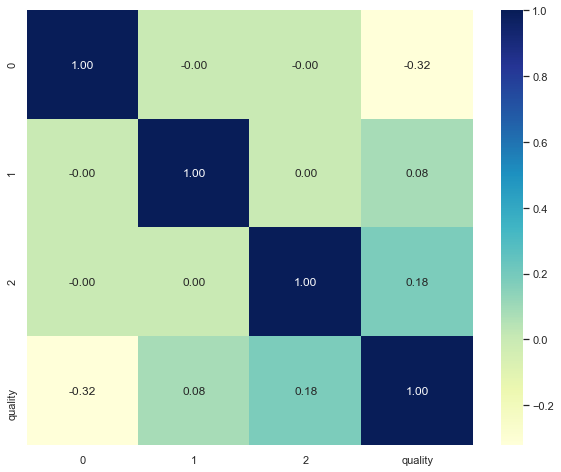

In [93]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
corr = pca_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="YlGnBu",
            annot=True,
           fmt=".2f")
plt.show()

In [94]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
